In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
import numpy as np
import seaborn as sns
import os
import shutil
import pickle
import re
import time
import sys
import pdb
import pandas as pd
from scipy.stats import poisson
from scipy.stats import norm

sns.set()

In [2]:
def perfect_SN(data_dict):
    
    high_noise = []
    high_flux = []
    high_wave = []
    high_ivar = []
    high_redshift = []
    high_class = []
    
    
    for i in range(len(data_dict['CLASS'])):
        
        if data_dict['NOISE'][i] >= 20.:
            
            high_noise.append(data_dict['NOISE'][i])
            high_flux.append(data_dict['FLUX'][i])
            high_wave.append(data_dict['WAVE'][i])
            high_ivar.append(data_dict['IVAR'][i])
            high_redshift.append(data_dict['REDSHIFT'][i])
            high_class.append(data_dict['CLASS'][i])
            
        else:
            pass
        
    
    highSN_dict = {'NOISE': high_noise, 'FLUX': high_flux, 'WAVE': high_wave, 'IVAR': high_ivar,\
                   'REDSHIFT': high_redshift, 'CLASS': high_class}
    
    return highSN_dict 

In [3]:
input_data_quasar_high = \
pd.read_pickle("/Users/matt/Desktop/DESI_Research/DESI_ML/var_CNN/Dictionaries/corrected_preprocessed_joined_obj_dict/quasar_star_preprocessed_data_high")


input_data_quasar_low = \
pd.read_pickle("/Users/matt/Desktop/DESI_Research/DESI_ML/var_CNN/Dictionaries/corrected_preprocessed_joined_obj_dict/var_star_preprocessed_data_low")


input_data_quasar_fake = \
pd.read_pickle("/Users/matt/Desktop/DESI_Research/DESI_ML/var_CNN/Dictionaries/corrected_preprocessed_joined_obj_dict/low_fake_star_input_data")

high_dict = pd.read_pickle("/Users/matt/Desktop/DESI_Research/DESI_ML/var_CNN/Dictionaries/object_dict/high_SN_quasar_dict")



# Plots of star & quasar in each dataset

## High SN

In [4]:
len(input_data_quasar_high['LABELS'])

4910

Text(0, 0.5, 'Normalized Flux')

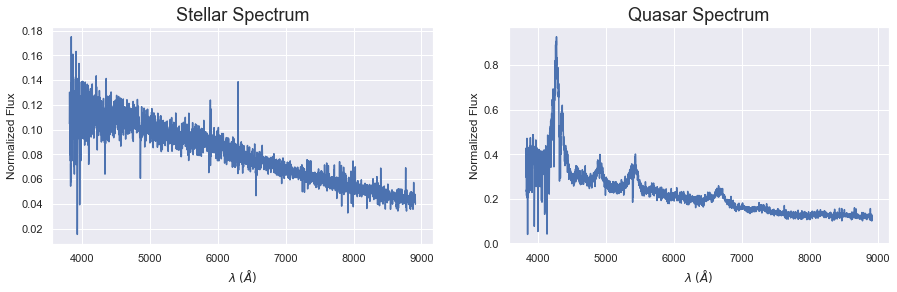

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(15, 4))
ax1.plot(10**input_data_quasar_high['WAVE'][0], input_data_quasar_high['FLUX'][0]);
ax1.set_title('Stellar Spectrum', fontsize=18);
ax1.set_xlabel('$\lambda$ $(\AA)$')
ax1.set_ylabel('Normalized Flux')

ax2.plot(10**input_data_quasar_high['WAVE'][1], input_data_quasar_high['FLUX'][1])
ax2.set_title('Quasar Spectrum', fontsize=18);
ax2.set_xlabel('$\lambda$ $(\AA)$')
ax2.set_ylabel('Normalized Flux')


## Low SN

In [6]:
len(input_data_quasar_low['LABELS'])

4910

Text(0, 0.5, 'Normalized Flux')

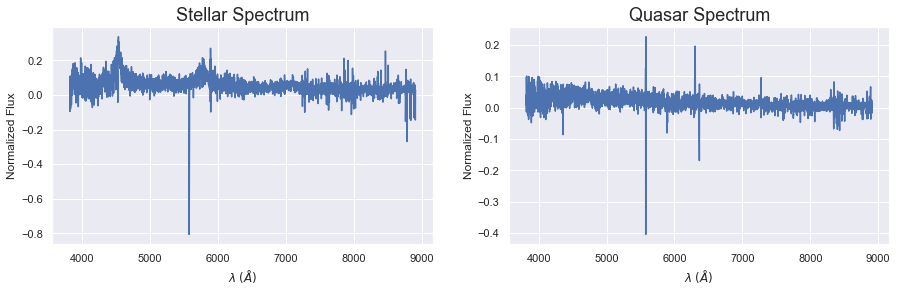

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(15, 4))
ax1.plot(10**input_data_quasar_low['WAVE'][0], input_data_quasar_low['FLUX'][0]);
ax1.set_title('Stellar Spectrum', fontsize=18);
ax1.set_xlabel('$\lambda$ $(\AA)$')
ax1.set_ylabel('Normalized Flux')

ax2.plot(10**input_data_quasar_low['WAVE'][2], input_data_quasar_low['FLUX'][2])
ax2.set_title('Quasar Spectrum', fontsize=18);
ax2.set_xlabel('$\lambda$ $(\AA)$')
ax2.set_ylabel('Normalized Flux')


## Fake SN

In [8]:
len(input_data_quasar_fake['LABELS'])

4860

Text(0, 0.5, 'Normalized Flux')

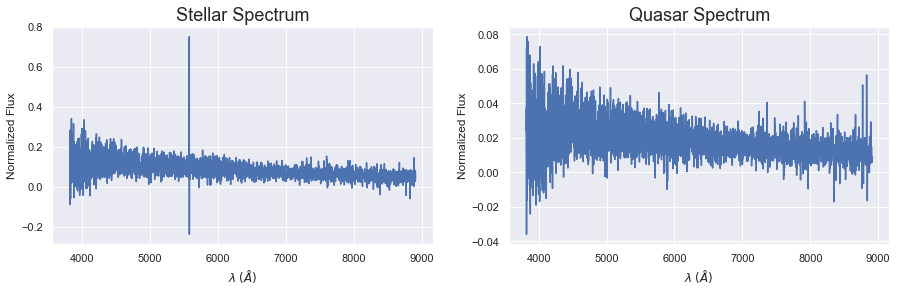

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(15, 4))
ax1.plot(10**input_data_quasar_fake['WAVE'][0], input_data_quasar_fake['FLUX'][0]);
ax1.set_title('Stellar Spectrum', fontsize=18);
ax1.set_xlabel('$\lambda$ $(\AA)$')
ax1.set_ylabel('Normalized Flux')

ax2.plot(10**input_data_quasar_fake['WAVE'][2], input_data_quasar_fake['FLUX'][2])
ax2.set_title('Quasar Spectrum', fontsize=18);
ax2.set_xlabel('$\lambda$ $(\AA)$')
ax2.set_ylabel('Normalized Flux')

# Redshift range difference in quasar spectra

In [49]:
redshift= []
wave = []
flux = []
labels = []

for i in range(len(input_data_quasar_high['LABELS'])):
    
    if input_data_quasar_high['LABELS'][i] == 0:
        redshift.append(input_data_quasar_high['REDSHIFT'][i])
        wave.append(input_data_quasar_high['WAVE'][i])
        flux.append(input_data_quasar_high['FLUX'][i])
        labels.append(input_data_quasar_high['LABELS'][i])

In [50]:
input_data_quasar_high.keys()

dict_keys(['IMAGES', 'LABELS', 'NOISE', 'FLUX', 'WAVE', 'REDSHIFT'])

In [54]:
print(len(wave))
print(len(flux))
print(len(labels))

2455
2455
2455


In [56]:
labels[2071]

0.0

In [52]:
len(wave[831])

3681

In [53]:
print(np.argmax(redshift))
print(np.argmin(redshift))

831
2071


In [14]:
print(redshift[831])
print(redshift[2071])


[3.0496426]
[2.450109]


In [58]:
print(wave[2071])
print(flux[2071])

[3.5819 3.582  3.5821 ... 3.9497 3.9498 3.9499]
[0.44981694 0.43521148 0.42379856 ... 0.07768797 0.15924835 0.1295292 ]


Text(0, 0.5, 'Normalized Flux')

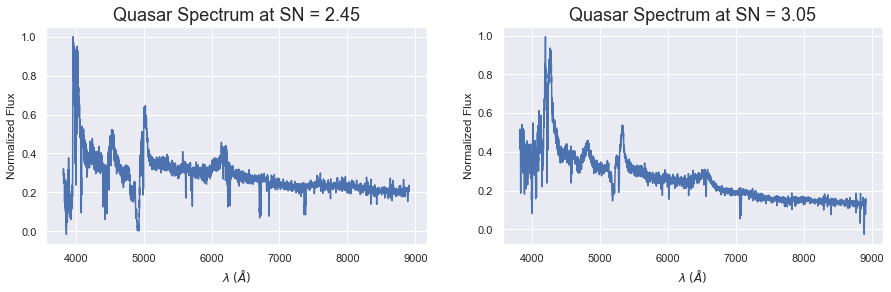

In [60]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(15, 4))
ax1.plot(10**wave[831], flux[831])#
ax1.set_title('Quasar Spectrum at SN = 2.45', fontsize=18);
ax1.set_xlabel('$\lambda$ $(\AA)$')
ax1.set_ylabel('Normalized Flux')

ax2.plot(10**wave[2071], flux[2071]);
ax2.set_title('Quasar Spectrum at SN = 3.05', fontsize=18)#
ax2.set_xlabel('$\lambda$ $(\AA)$')
ax2.set_ylabel('Normalized Flux')

# Redshift Distribution

In [16]:
def quasars(data_dict):
    
    redshift = []
    
    for i in range(len(data_dict['LABELS'])):
        
        if data_dict['LABELS'][i] == 0:
            
            redshift.append(data_dict['REDSHIFT'][i])
            
    return redshift

In [17]:
fake_z = quasars(input_data_quasar_fake)
high_z = quasars(input_data_quasar_high)
low_z = quasars(input_data_quasar_low)

Text(0, 0.5, 'Number per bin')

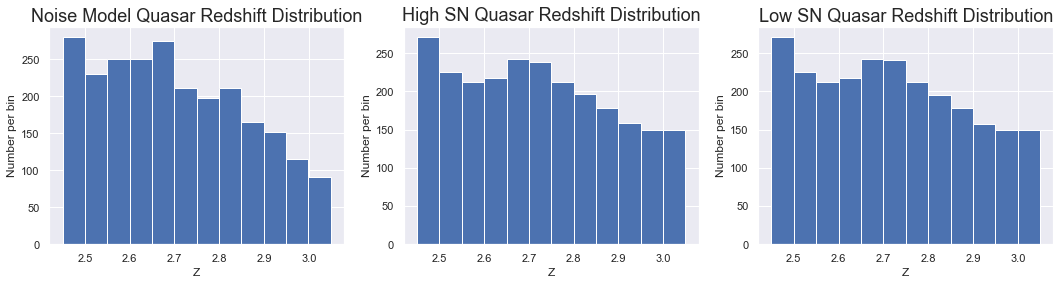

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, figsize=(18, 4))
ax1.hist(np.asarray(fake_z), bins = 12);
ax1.set_title('Noise Model Quasar Redshift Distribution', fontsize=18);
ax1.set_xlabel('Z')
ax1.set_ylabel('Number per bin')

ax2.hist(np.asarray(high_z), bins = 12)
ax2.set_title('High SN Quasar Redshift Distribution', fontsize=18);
ax2.set_xlabel('Z')
ax2.set_ylabel('Number per bin')

ax3.hist(np.asarray(low_z), bins = 12)
ax3.set_title('Low SN Quasar Redshift Distribution', fontsize=18);
ax3.set_xlabel('Z')
ax3.set_ylabel('Number per bin')

# S/N Distribution

In [19]:
low_var_indx = np.where(input_data_quasar_low['LABELS'] == 0)

fake_qso_indx = np.where(input_data_quasar_fake['LABELS'] == 0)
fake_star_indx = np.where(input_data_quasar_fake['LABELS'] == 1)

Text(0, 0.5, 'Number per bin')

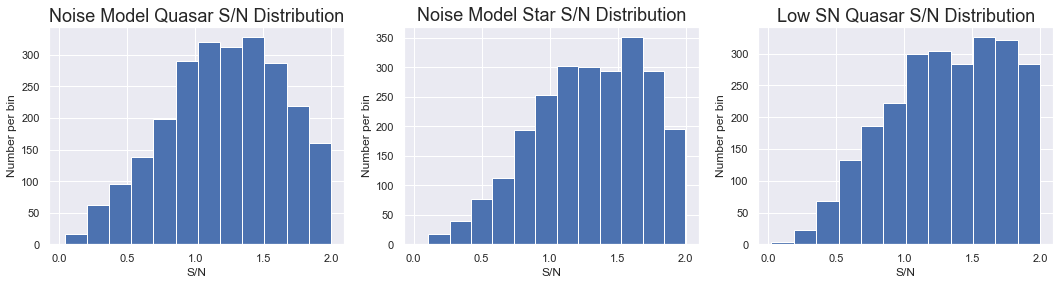

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, figsize=(18, 4))
ax1.hist(input_data_quasar_fake['FAKE_NOISE'][fake_qso_indx], bins = 12);
ax1.set_title('Noise Model Quasar S/N Distribution', fontsize=18);
ax1.set_xlabel('S/N')
ax1.set_ylabel('Number per bin')

ax2.hist(input_data_quasar_fake['FAKE_NOISE'][fake_star_indx], bins = 12)
ax2.set_title('Noise Model Star S/N Distribution', fontsize=18);
ax2.set_xlabel('S/N')
ax2.set_ylabel('Number per bin')

ax3.hist(input_data_quasar_low['NOISE'][low_var_indx], bins = 12)
ax3.set_title('Low SN Quasar S/N Distribution', fontsize=18);
ax3.set_xlabel('S/N')
ax3.set_ylabel('Number per bin')

# Noise Model Plots

variance, scaled variance, original spectrum, scaled spectrum, std vs 

In [21]:
input_data_quasar_fake = \
pd.read_pickle("/Users/matt/Desktop/DESI_Research/DESI_ML/var_CNN/Dictionaries/corrected_preprocessed_joined_obj_dict/low_fake_star_input_data")


In [22]:
input_data_quasar_fake['LABELS'][:10]

array([1., 0., 1., 1., 1., 0., 1., 0., 0., 1.])

Text(0, 0.5, 'Normalized Flux')

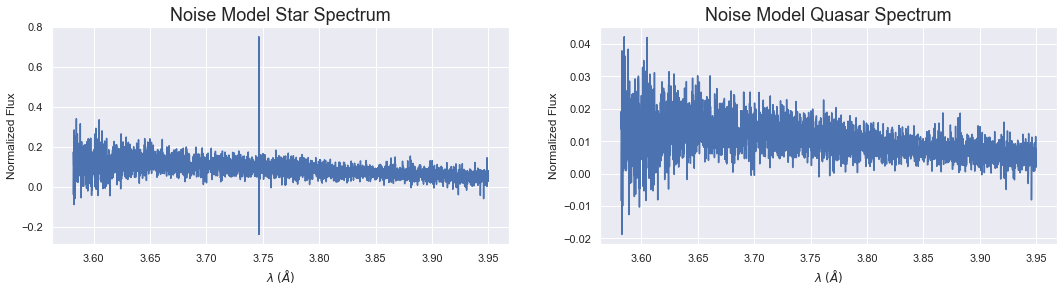

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(18, 4))
ax1.plot(input_data_quasar_fake['WAVE'][0],input_data_quasar_fake['FLUX'][0] );
ax1.set_title('Noise Model Star Spectrum', fontsize=18);
ax1.set_xlabel('$\lambda$ $(\AA)$')
ax1.set_ylabel('Normalized Flux')

ax2.plot(input_data_quasar_fake['WAVE'][6],input_data_quasar_fake['FLUX'][6])
ax2.set_title('Noise Model Quasar Spectrum', fontsize=18);
ax2.set_xlabel('$\lambda$ $(\AA)$')
ax2.set_ylabel('Normalized Flux')

In [24]:
fake_dict = pd.read_pickle("/Users/matt/Desktop/DESI_Research/DESI_ML/var_CNN/Dictionaries/object_dict/fake_dict")

fake_dict.keys()

dict_keys(['FAKE_NOISE', 'NOISE', 'WAVE', 'REDSHIFT', 'FLUX', 'CLASS'])

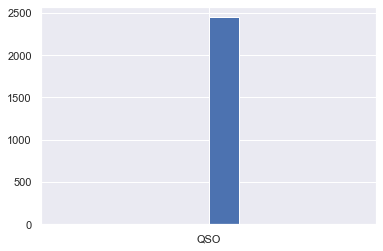

In [25]:
a,b,c = plt.hist(fake_dict['CLASS'], bins = 10)

In [26]:
fake_dict['NOISE'][856]

array([21.478626], dtype=float32)

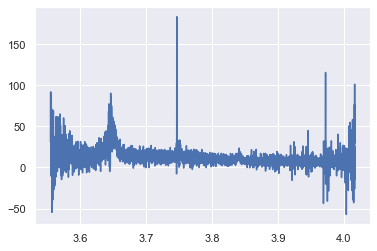

In [27]:
plt.plot(fake_dict['WAVE'][856], fake_dict['FLUX'][856])

In [28]:
print(len(fake_dict['NOISE']))

2449


In [29]:
perfectSN_dict = perfect_SN(high_dict)

Standard Deviation of the Spectrum = 0.4129575
Standard Deviation of the deviate of ~ 1.5 SN = 7.43818576282339
Standard Deviation of the deviate of ~ 3 SN = 3.738089926435782
Standard Deviation of the deviate of ~ 6 SN = 1.869044963217891
Standard Deviation of the deviate of ~ 13 SN = 0.9345224816089455
Standard Deviation of the deviate for the Spectrum = 0.8439475


/Users/matt/anaconda3/envs/ML/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


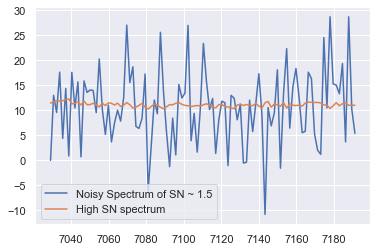

In [30]:
perfectSN_dict = perfect_SN(high_dict)


noise = perfectSN_dict['NOISE']
ivar = perfectSN_dict['IVAR']
wave = perfectSN_dict['WAVE']
flux = perfectSN_dict['FLUX']
labels = perfectSN_dict['CLASS']

var0 = 1/ivar[856]
new_var = np.nan_to_num(var0, posinf=0.0, neginf=0.0, nan=0.0)
new_std = new_var**0.5


gauss_deviate13 = norm.rvs(size = len(flux[856]),scale = 2*new_std, loc = 0, random_state = 0) #10
gauss_deviate6 = norm.rvs(size = len(flux[856]), scale = 4*new_std, loc = 0, random_state = 0) # 5
gauss_deviate3 = norm.rvs(size = len(flux[856]), scale = 8*new_std, loc = 0, random_state = 0) # 2.5
gauss_deviate1_5 = norm.rvs(size = len(flux[856]), scale = 16*new_std, loc = 0, random_state = 0) # 1.25

noisy_flux13 = flux[856] + gauss_deviate13 
noisy_flux6 = flux[856] + gauss_deviate6 
noisy_flux3 = flux[856] + gauss_deviate3
noisy_flux1_5 = flux[856] + gauss_deviate1_5

SN_26 = (np.mean(flux[856]))/(np.std(flux[856]))
SN_13 = (np.mean(noisy_flux13))/(np.std(noisy_flux13))
SN_6 = (np.mean(noisy_flux6))/(np.std(noisy_flux6))
SN_3 = (np.mean(noisy_flux3))/(np.std(noisy_flux3))
SN_1_5 = (np.mean(noisy_flux1_5))/(np.std(noisy_flux1_5))

plt.plot(10**wave[856][2950:3050], noisy_flux1_5[2950:3050], label = 'Noisy Spectrum of SN ~ 1.5')
plt.plot(10**wave[856][2950:3050], flux[856][2950:3050], label = 'High SN spectrum')
#plt.plot(10**wave[856], flux[856], label = 'High SN Spectrum')
#plt.plot(10**wave[856], noisy_flux1_5 - flux[856], label = 'Noise Model')
#plt.plot(10**wave[856], noisy_flux1_5, alpha = 0.5, label = 'Noisy spectrum of SN ~ 1.5')


plt.legend()

#plt.ylim(0,100)
#plt.xlim(3.5818, 3.95)
#plt.xlim(3.702, 3.704)

# print('Mean of the spectrum =', np.mean(flux[0][2000:2100]))
#print('Mean of the spectrum =', np.mean(flux[0]))


print('Standard Deviation of the Spectrum =',np.std(flux[856][2950:3050])) 

#print('Standard Deviation of the Fake Data of ~ 1.5 SN =',np.std(noisy_flux1_5[:100]))
# print('Standard Deviation of the deviate of ~ 1.5 SN =', np.std(gauss_deviate1_5[2950:3050]))
print('Standard Deviation of the deviate of ~ 1.5 SN =', np.std(noisy_flux1_5[2950:3050])) #- flux[856][2950:3050]))


#print('Standard Deviation of the Fake Data of ~ 3 SN =',np.std(noisy_flux3[:100])) 
print('Standard Deviation of the deviate of ~ 3 SN =', np.std(gauss_deviate3[2950:3050]))

#print('Standard Deviation of the Fake Data of ~ 6 SN =',np.std(noisy_flux6[:100])) 
print('Standard Deviation of the deviate of ~ 6 SN =', np.std(gauss_deviate6[2950:3050]))

print('Standard Deviation of the deviate of ~ 13 SN =', np.std(gauss_deviate13[2950:3050]))

print('Standard Deviation of the deviate for the Spectrum =', np.std(new_std))
#print('Var of Spectrum =', np.var(flux[0]))

In [31]:
print(noise[:10])

[array([26.667807], dtype=float32), array([31.774118], dtype=float32), array([21.549913], dtype=float32), array([21.718445], dtype=float32), array([28.136017], dtype=float32), array([24.370073], dtype=float32), array([28.959366], dtype=float32), array([20.761955], dtype=float32), array([21.979488], dtype=float32), array([44.52084], dtype=float32)]


SN 26 = 1.6004713
SN 6 = 1.4278308290719584
SN 1.5 = 0.7260544452044186
[20.012075]


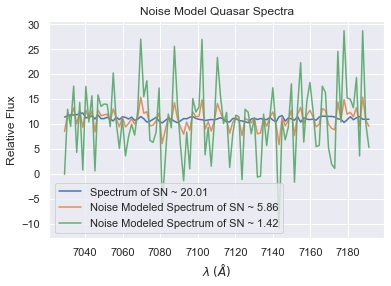

In [32]:
plt.plot(10**wave[856][2950:3050], flux[856][2950:3050],  label = 'Spectrum of SN ~ 20.01')
#plt.plot(10**wave[856][2950:3050], noisy_flux13[2950:3050], alpha = 0.5, label = 'Spectrum of SN ~ 10')
plt.plot(10**wave[856][2950:3050], noisy_flux6[2950:3050], alpha = 0.9, label = 'Noise Modeled Spectrum of SN ~ 5.86')
#plt.plot(10**wave[856][2950:3050], noisy_flux3[2950:3050], alpha = 0.5, label = 'Spectrum of SN ~ 2.5')
plt.plot(10**wave[856][2950:3050], noisy_flux1_5[2950:3050], alpha = 0.9, label = 'Noise Modeled Spectrum of SN ~ 1.42')
plt.legend()
plt.title('Noise Model Quasar Spectra')
plt.xlabel('$\lambda$ $(\AA)$')
plt.ylabel('Relative Flux')

print('SN 26 =', SN_26) 

#print('SN 13 =', SN_13) 
print('SN 6 =', SN_6) 
#print('SN 3 =', SN_3) 
print('SN 1.5 =', SN_1_5) 
print(noise[856])

In [33]:
fake_star_dict = pd.read_pickle("/Users/matt/Desktop/DESI_Research/DESI_ML/var_CNN/Dictionaries/object_dict/fake_star_dict")


In [34]:
fake_star_dict.keys()

dict_keys(['NOISE', 'WAVE', 'FLUX', 'CLASS', 'REDSHIFT', 'FAKE_NOISE'])

In [35]:
def calc_star_model_noise(merg_dict):
    """
    Code calculates the changed noise via the noise model
    """
        
    labels = merg_dict['CLASS']
    new_noise = []
    
    for i in range(len(labels)):
    
        if labels[i] == 'STAR':
        
            new_noise.append(np.mean(merg_dict['FLUX'][i])\
                     /(np.std(merg_dict['FLUX'][i])))      
            
    merg_dict['FAKE_NOISE'] = new_noise
    
    
    return merg_dict

def star_merg_dict(dict1, dict2,dict3,dict4):
    """This code merges dictionaries together that all have the same keys and assigns them to a new dictionary"""
    
    dict_list = [dict1, dict2, dict3, dict4]
    merged_dict = {}
    for k in dict1.keys():
        merged_dict[k] = np.concatenate(list(merged_dict[k] for merged_dict in dict_list))
        
    return merged_dict

In [36]:
star_perf_dict = perfect_SN(star_dict)

NameError: name 'star_dict' is not defined

In [ ]:
fake_star_dict['CLASS']

In [ ]:
star_wave = fake_star_dict['WAVE']
star_flux = fake_star_dict['FLUX']
star_fake_noise = fake_star_dict['FAKE_NOISE']
star_noise = fake_star_dict['NOISE']
star_class = fake_star_dict['CLASS']

In [ ]:
x = np.where( star_class == 'STAR')

In [ ]:
perfectSN_dict = perfect_SN(input_data_quasar_fake)


noise = perfectSN_dict['NOISE']
ivar = perfectSN_dict['IVAR']
wave = perfectSN_dict['WAVE']
flux = perfectSN_dict['FLUX']
labels = perfectSN_dict['LABELS']

var0 = 1/ivar[856]
new_var = np.nan_to_num(var0, posinf=0.0, neginf=0.0, nan=0.0)
new_std = new_var**0.5


gauss_deviate13 = norm.rvs(size = len(flux[856]),scale = 2*new_std, loc = 0, random_state = 0) #10
gauss_deviate6 = norm.rvs(size = len(flux[856]), scale = 4*new_std, loc = 0, random_state = 0) # 5
gauss_deviate3 = norm.rvs(size = len(flux[856]), scale = 8*new_std, loc = 0, random_state = 0) # 2.5
gauss_deviate1_5 = norm.rvs(size = len(flux[856]), scale = 16*new_std, loc = 0, random_state = 0) # 1.25

noisy_flux13 = flux[856] + gauss_deviate13 
noisy_flux6 = flux[856] + gauss_deviate6 
noisy_flux3 = flux[856] + gauss_deviate3
noisy_flux1_5 = flux[856] + gauss_deviate1_5

SN_26 = (np.mean(flux[856]))/(np.std(flux[856]))
SN_13 = (np.mean(noisy_flux13))/(np.std(noisy_flux13))
SN_6 = (np.mean(noisy_flux6))/(np.std(noisy_flux6))
SN_3 = (np.mean(noisy_flux3))/(np.std(noisy_flux3))
SN_1_5 = (np.mean(noisy_flux1_5))/(np.std(noisy_flux1_5))

plt.plot(10**wave[856][2950:3050], noisy_flux1_5[2950:3050], label = 'Noisy Spectrum of SN ~ 1.5')
plt.plot(10**wave[856][2950:3050], flux[856][2950:3050], label = 'High SN spectrum')
#plt.plot(10**wave[856], flux[856], label = 'High SN Spectrum')
#plt.plot(10**wave[856], noisy_flux1_5 - flux[856], label = 'Noise Model')
#plt.plot(10**wave[856], noisy_flux1_5, alpha = 0.5, label = 'Noisy spectrum of SN ~ 1.5')


plt.legend()

#plt.ylim(0,100)
#plt.xlim(3.5818, 3.95)
#plt.xlim(3.702, 3.704)

# print('Mean of the spectrum =', np.mean(flux[0][2000:2100]))
#print('Mean of the spectrum =', np.mean(flux[0]))


print('Standard Deviation of the Spectrum =',np.std(flux[856][2950:3050])) 

#print('Standard Deviation of the Fake Data of ~ 1.5 SN =',np.std(noisy_flux1_5[:100]))
# print('Standard Deviation of the deviate of ~ 1.5 SN =', np.std(gauss_deviate1_5[2950:3050]))
print('Standard Deviation of the deviate of ~ 1.5 SN =', np.std(noisy_flux1_5[2950:3050])) #- flux[856][2950:3050]))


#print('Standard Deviation of the Fake Data of ~ 3 SN =',np.std(noisy_flux3[:100])) 
print('Standard Deviation of the deviate of ~ 3 SN =', np.std(gauss_deviate3[2950:3050]))

#print('Standard Deviation of the Fake Data of ~ 6 SN =',np.std(noisy_flux6[:100])) 
print('Standard Deviation of the deviate of ~ 6 SN =', np.std(gauss_deviate6[2950:3050]))

print('Standard Deviation of the deviate of ~ 13 SN =', np.std(gauss_deviate13[2950:3050]))

print('Standard Deviation of the deviate for the Spectrum =', np.std(new_std))
#print('Var of Spectrum =', np.var(flux[0]))

In [ ]:
SN_26 = (np.mean(flux[856][2950:3050]))/(np.std(flux[856][2950:3050]))
SN_13 = (np.mean(noisy_flux13[2950:3050]))/(np.std(noisy_flux13[2950:3050]))
SN_6 = (np.mean(noisy_flux6[2950:3050]))/(np.std(noisy_flux6[2950:3050]))
SN_3 = (np.mean(noisy_flux3[2950:3050]))/(np.std(noisy_flux3[2950:3050]))
SN_1_5 = (np.mean(noisy_flux1_5[2950:3050]))/(np.std(noisy_flux1_5[2950:3050]))

In [ ]:
print('SN 26 =', SN_26) 

print('SN 13 =', SN_13) 
print('SN 6 =', SN_6) 
print('SN 3 =', SN_3) 
print('SN 1.5 =', SN_1_5) 

## Noise distribution of low SN vs noise model 

In [ ]:
low_noise = input_data_quasar_low['NOISE']
low_labels = input_data_quasar_low['LABELS']
low_redshift = input_data_quasar_low['REDSHIFT']
low_q_noise = []
low_q_redshift = []

fake_noise = []
fake_labels = input_data_quasar_fake['LABELS']
fake_redshift = input_data_quasar_fake['REDSHIFT']  
high_noise = input_data_quasar_fake['NOISE']
fake_flux = input_data_quasar_fake['FLUX']

In [ ]:
print(low_noise[:100])
print(low_labels[:100])

In [ ]:
print(np.mean(high_noise[0]))
print(np.std(high_noise[0]))

In [ ]:
fake_noise = []
fake_labels = fake_dict['CLASS']
fake_redshift = fake_dict['REDSHIFT']  
high_noise = fake_dict['NOISE']
fake_flux = fake_dict['FLUX']

In [ ]:
print(fake_labels)

In [ ]:
for i in range(len(low_labels)):
    
    if low_labels[i] == 0. :
        low_q_noise.append(low_noise[i])
        low_q_redshift.append(low_redshift[i])
        
    else:
        pass
    
    
new_noise = []

for i in range(len(fake_labels)):
    
    if fake_labels[i] == 'QSO':
        
        new_noise.append(np.mean(fake_dict['FLUX'][i])\
                     /(np.std(fake_dict['FLUX'][i])))

# for i in range(len(fake_labels)):
    
#     if fake_labels[i] == 0.0:
        
#         new_noise.append(np.mean(input_data_quasar_fake['FLUX'][i])\
#                      /(np.std(input_data_quasar_fake['FLUX'][i])))
    
    
#         new_noise.append(np.mean(input_data_quasar_fake['FLUX'][i][2950:3050])\
#                      /(np.std(input_data_quasar_fake['FLUX'][i][2950:3050])))

In [ ]:
print(low_labels[:100])

In [ ]:
print(len(low_q_noise))
print(len(new_noise))

In [ ]:
bin_list = [0, .2, .4, .6, .8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.]

len(bin_list)
#bins = np.arange(min(np.asarray(low_q_noise)), max(np.asarray(low_q_noise)) + .2, 0.2))
#bins=np.arange(min(np.asarray(new_noise)), max(np.asarray(new_noise)) + .2, 0.2)

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, figsize=(18, 4))
ax1.hist(np.asarray(low_q_noise), bins = bin_list );
ax1.set_title('Low SN Variable QSO Noise Distribution', fontsize=18);
ax1.set_xlabel('Noise')
ax1.set_ylabel('Number per bin')
#ax1.set_xlim(0,.25)

ax2.hist(np.asarray(new_noise), bins = bin_list)
ax2.set_title('Fake low SN Noise Model Noise Distributtion', fontsize=18);
ax2.set_xlabel('Noise')
ax2.set_ylabel('Number per bin')
ax2.set_ylim(0,400)


In [ ]:
plt.hist(, bins = 12, label = 'Low Var')
plt.hist(), bins = 12, label = 'Low Fake')
plt.legend()

In [ ]:
print(low_q_noise)